## Chocolate Bars Analysis

***

## Project Description

As part of the data science team at Gourmet Analytics, you use data analytics to advise companies in the food industry. You clean, organize, and visualize data to arrive at insights that will benefit your clients. As a member of a collaborative team, sharing your analysis with others is an important part of your job. 

Your current client is Chocolate and Tea, an up-and-coming chain of cafes. 

The eatery combines an extensive menu of fine teas with chocolate bars from around the world. Their diverse selection includes everything from plantain milk chocolate, to tangerine white chocolate, to dark chocolate with pistachio and fig. The encyclopedic list of chocolate bars is the basis of Chocolate and Tea’s brand appeal. Chocolate bar sales are the main driver of revenue. 

Chocolate and Tea aims to serve chocolate bars that are highly rated by professional critics. They also continually adjust the menu to make sure it reflects the global diversity of chocolate production. The management team regularly updates the chocolate bar list in order to align with the latest ratings and to ensure that the list contains bars from a variety of countries. 

They’ve asked you to collect and analyze data on the latest chocolate ratings. In particular, they’d like to know which countries produce the highest-rated bars of super dark chocolate (at least 80% cocoa). This data will help them create their next chocolate bar menu. 

Your team has received a dataset that features the latest ratings for thousands of chocolates from around the world. Click here to access the dataset. Given the data and the nature of the work you will do for your client, your team agrees to use R for this project. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Company (Maker-if known)|	Name of the company manufacturing the bar.|
| Specific Bean Originor Bar Name|	The specific geo-region of origin for the bar.|
| REF|	A value linked to when the review was entered in the database. Higher = more recent.|
| ReviewDate|	Date of publication of the review.|
| CocoaPercent|	Cocoa percentage (darkness) of the chocolate bar being reviewed.|
| CompanyLocation|	Manufacturer base country.|
| Rating|	Expert rating for the bar.|
| BeanType|	The variety (breed) of bean used, if provided.|
| Broad BeanOrigin|	The broad geo-region of origin for the bean.|

## Data sources used

Chocolate Bar Ratings dataset from Kaggle. This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

## Business Task

Analyze chocolate bars to find best ratings and recommend which ones for sales. Chocolate Bar Ratings dataset containing 1700 versions are used.

## Metrics Used

Only chocolate bars with minimum ratings 4.0 and above will be considered and 80% cocoa content

## Assumptions

All data is normally distributed.

## Data Tasks

- Load data and perform simple statistical analysis
- Use Groupings to look at mean ratings
- Cleaning data work in filling missing values, check duplicates and outliers
- Perform hypothesis testing
- Plot graphs
- Focus on company requirements

## Summary

Only two companies qualified for supplying high quality chocolate bars: **Pralus and Soma**

## Recommendation for Action

- Either reduce the rating to 3.75 for more suppliers to chose
- Search for other datasets on chocolate bar ratings

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("flavors_of_cacao.csv")

In [3]:
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,NaN,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,NaN,India


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1795 non-null   object 
 1   SpecificBeanOrigin  1795 non-null   object 
 2   REF                 1795 non-null   int64  
 3   ReviewDate          1795 non-null   int64  
 4   CocoaPercent        1795 non-null   float64
 5   CompanyLocation     1795 non-null   object 
 6   Rating              1795 non-null   float64
 7   BeanType            907 non-null    object 
 8   BroadBeanOrigin     1721 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [5]:
df.describe()

,REF,ReviewDate,CocoaPercent,Rating
count,1795.00,1795.00,1795.00,1795.00
mean,1035.90,2012.33,0.72,3.19
std,552.89,2.93,0.06,0.48
min,5.00,2006.00,0.42,1.00
25%,576.00,2010.00,0.70,2.88
50%,1069.00,2013.00,0.70,3.25
75%,1502.00,2015.00,0.75,3.50
max,1952.00,2017.00,1.00,5.00


In [6]:
df.columns

Index(['Company', 'SpecificBeanOrigin', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin'], dtype='object')

### Groupby Function

In [7]:
df.groupby("Company")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
Company,,
A. Morin,0.69,3.38
AMMA,0.69,3.50
Acalli,0.70,3.75
Adi,0.75,3.25
Aequare (Gianduja),0.62,2.88
...,...,...
hello cocoa,0.66,3.12
hexx,0.71,3.05
iQ Chocolate,0.72,2.88


In [8]:
df.groupby("SpecificBeanOrigin")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
SpecificBeanOrigin,,
"""heirloom"", Arriba Nacional",0.79,3.50
100 percent,1.00,1.50
2009 Hapa Nibby,0.70,3.75
"A case of the Xerces Blues, triple roast",0.70,3.50
ABOCFA Coop,0.70,4.00
...,...,...
black label,0.72,3.00
la Amistad,0.70,3.50
one hundred,1.00,2.00


In [9]:
df.groupby("ReviewDate")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
ReviewDate,,
2006,0.71,3.12
2007,0.72,3.16
2008,0.73,2.99
2009,0.70,3.07
2010,0.71,3.15
2011,0.71,3.26
2012,0.72,3.18
2013,0.72,3.20
2014,0.72,3.19


In [10]:
df.groupby("CompanyLocation")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
CompanyLocation,,
Amsterdam,0.73,3.50
Argentina,0.73,3.31
Australia,0.70,3.36
Austria,0.72,3.24
Belgium,0.72,3.09
Bolivia,0.73,3.25
Brazil,0.70,3.40
Canada,0.72,3.32
Chile,0.70,3.75


In [11]:
df.groupby("BeanType")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
BeanType,,
Amazon,0.70,3.25
Amazon mix,0.74,3.75
"Amazon, ICS",0.68,3.62
Beniano,0.71,3.58
Blend,0.71,3.35
"Blend-Forastero,Criollo",0.70,3.75
CCN51,0.65,3.50
Criollo,0.72,3.24
Criollo (Amarru),0.70,3.25


In [12]:
df.groupby("BroadBeanOrigin")["CocoaPercent","Rating"].mean()

,CocoaPercent,Rating
BroadBeanOrigin,,
"Africa, Carribean, C. Am.",0.74,2.75
Australia,0.69,3.25
Belize,0.73,3.23
Bolivia,0.72,3.20
Brazil,0.71,3.28
...,...,...
"Venezuela, Java",0.70,4.00
"Venezuela, Trinidad",0.62,2.50
Venezuela/ Ghana,0.85,3.50


In [13]:
df.Rating.value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

### Pandas-Profiling Reports

In [14]:
#profile = ProfileReport(df=df, title='Cocao Report', minimal=True)

In [15]:
#profile.to_notebook_iframe()

In [16]:
#profile.to_file("Cocao_Report.html")

## Data Visualization

### Univariate Data Exploration

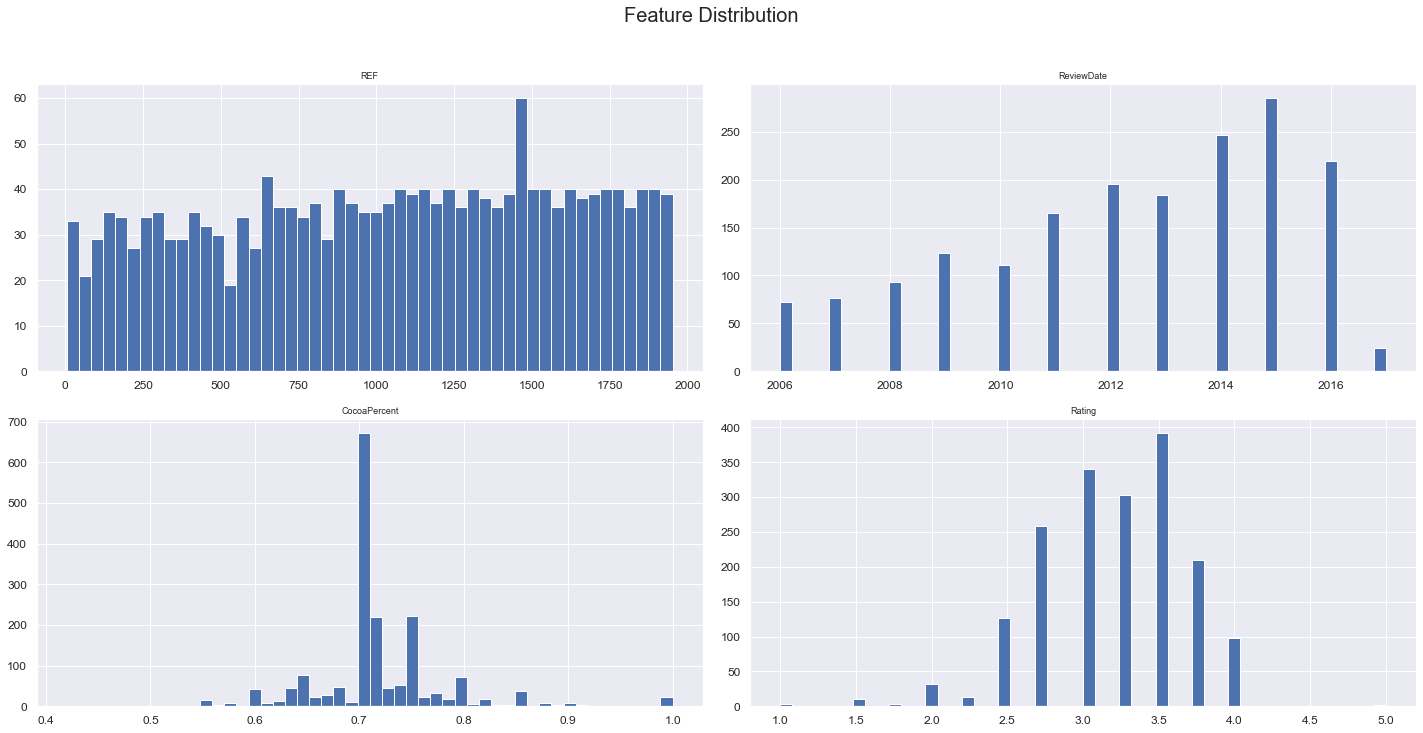

In [17]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

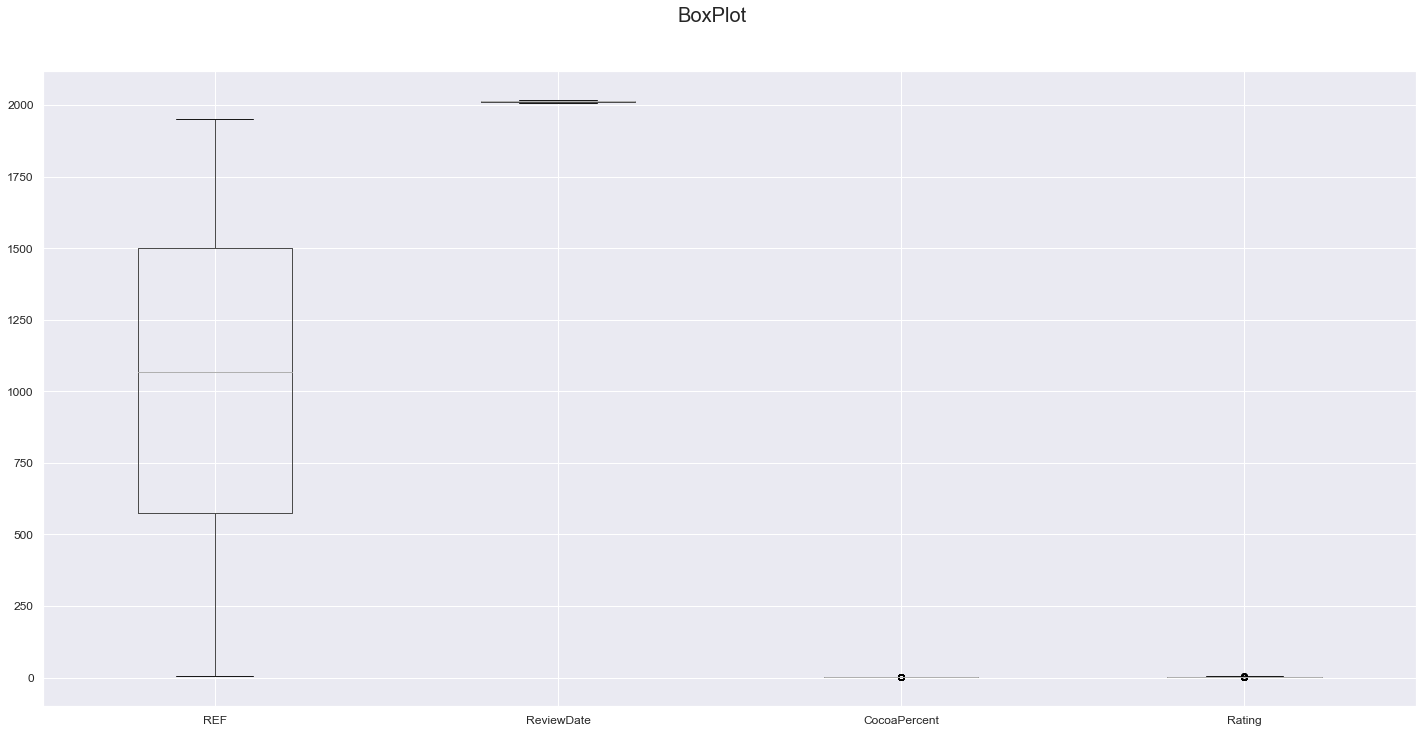

In [18]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

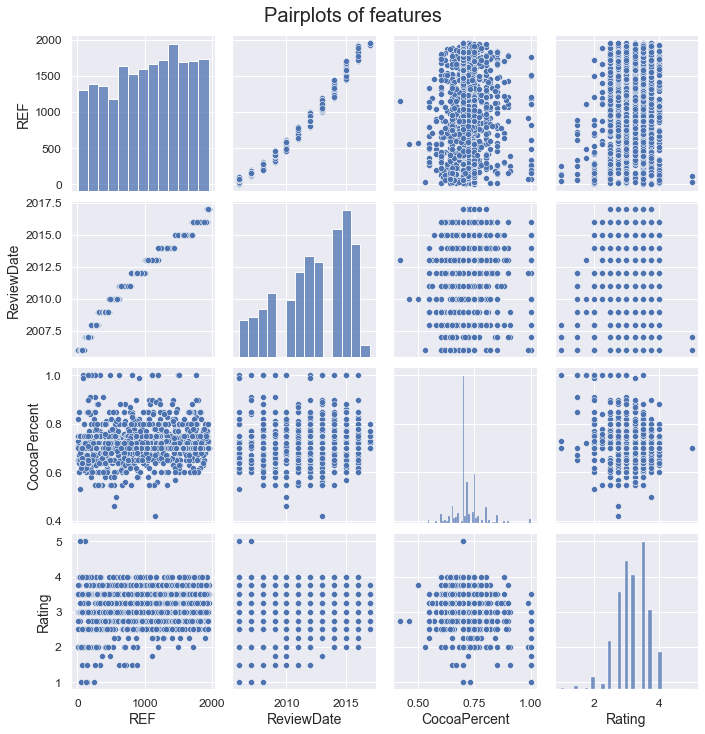

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Regression plot

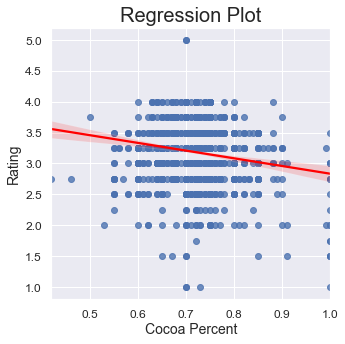

In [20]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(1,1, figsize=(5,5))

#BMI

ax = sns.regplot(x=df.CocoaPercent, y=df.Rating, line_kws=line_color, ax=ax)
ax.set_xlabel("Cocoa Percent")
ax.set_ylabel("Rating")
ax.set_title("Regression Plot", fontsize=20)


plt.show()

### Correlation

In [21]:
df.corr()

,REF,ReviewDate,CocoaPercent,Rating
REF,1.00,0.99,0.04,0.10
ReviewDate,0.99,1.00,0.04,0.10
CocoaPercent,0.04,0.04,1.00,-0.17
Rating,0.10,0.10,-0.17,1.00


In [22]:
df.corr()["Rating"].sort_values()

CocoaPercent   -0.17
ReviewDate      0.10
REF             0.10
Rating          1.00
Name: Rating, dtype: float64

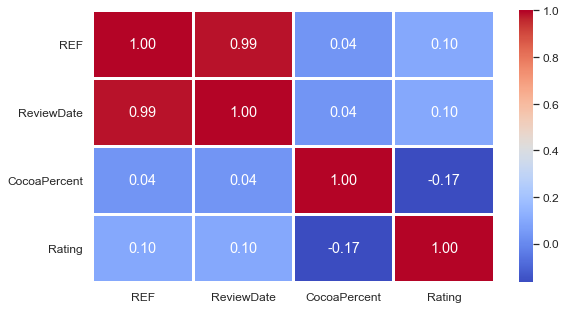

In [23]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

In [24]:
df.head()

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru


### Drop unwanted features

In [25]:
df.columns

Index(['Company', 'SpecificBeanOrigin', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin'], dtype='object')

In [26]:
df.drop(["REF"],axis=1,inplace=True)

In [27]:
df.head()

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,2015,0.70,France,3.50,NaN,Peru


### Treat Missing Values

In [28]:
df.isnull().sum()

Company                 0
SpecificBeanOrigin      0
ReviewDate              0
CocoaPercent            0
CompanyLocation         0
Rating                  0
BeanType              888
BroadBeanOrigin        74
dtype: int64

In [29]:
df['BeanType'] = df['BeanType'].replace(np.nan,"Missing")

In [30]:
df['BroadBeanOrigin'] = df['BroadBeanOrigin'].replace(np.nan,"Missing")

In [31]:
df.isnull().sum()

Company               0
SpecificBeanOrigin    0
ReviewDate            0
CocoaPercent          0
CompanyLocation       0
Rating                0
BeanType              0
BroadBeanOrigin       0
dtype: int64

In [32]:
df

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,2016,0.63,France,3.75,Missing,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,2.75,Missing,Togo
2,A. Morin,Atsane,2015,0.70,France,3.00,Missing,Togo
3,A. Morin,Akata,2015,0.70,France,3.50,Missing,Togo
4,A. Morin,Quilla,2015,0.70,France,3.50,Missing,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,0.70,Austria,3.75,Missing,Peru
1791,Zotter,Congo,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,0.62,Austria,3.25,Missing,India


### Treat Duplicate Values

In [33]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [34]:
df.describe(include='all')

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
count,1795,1795,1795.00,1795.00,1795,1795.00,1795,1795
unique,416,1039,nan,nan,60,nan,41,100
top,Soma,Madagascar,nan,nan,U.S.A.,nan,Missing,Venezuela
freq,47,57,nan,nan,764,nan,888,214
mean,NaN,NaN,2012.33,0.72,NaN,3.19,NaN,NaN
std,NaN,NaN,2.93,0.06,NaN,0.48,NaN,NaN
min,NaN,NaN,2006.00,0.42,NaN,1.00,NaN,NaN
25%,NaN,NaN,2010.00,0.70,NaN,2.88,NaN,NaN
50%,NaN,NaN,2013.00,0.70,NaN,3.25,NaN,NaN
75%,NaN,NaN,2015.00,0.75,NaN,3.50,NaN,NaN


### Type Change

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1795 non-null   object 
 1   SpecificBeanOrigin  1795 non-null   object 
 2   ReviewDate          1795 non-null   int64  
 3   CocoaPercent        1795 non-null   float64
 4   CompanyLocation     1795 non-null   object 
 5   Rating              1795 non-null   float64
 6   BeanType            1795 non-null   object 
 7   BroadBeanOrigin     1795 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 112.3+ KB


In [36]:
df["RatingCat"] = df["Rating"].copy()

In [37]:
df

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,RatingCat
0,A. Morin,Agua Grande,2016,0.63,France,3.75,Missing,Sao Tome,3.75
1,A. Morin,Kpime,2015,0.70,France,2.75,Missing,Togo,2.75
2,A. Morin,Atsane,2015,0.70,France,3.00,Missing,Togo,3.00
3,A. Morin,Akata,2015,0.70,France,3.50,Missing,Togo,3.50
4,A. Morin,Quilla,2015,0.70,France,3.50,Missing,Peru,3.50
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,0.70,Austria,3.75,Missing,Peru,3.75
1791,Zotter,Congo,2011,0.65,Austria,3.00,Forastero,Congo,3.00
1792,Zotter,Kerala State,2011,0.65,Austria,3.50,Forastero,India,3.50
1793,Zotter,Kerala State,2011,0.62,Austria,3.25,Missing,India,3.25


In [38]:
df["RatingCat"] = df["RatingCat"].astype("category")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Company             1795 non-null   object  
 1   SpecificBeanOrigin  1795 non-null   object  
 2   ReviewDate          1795 non-null   int64   
 3   CocoaPercent        1795 non-null   float64 
 4   CompanyLocation     1795 non-null   object  
 5   Rating              1795 non-null   float64 
 6   BeanType            1795 non-null   object  
 7   BroadBeanOrigin     1795 non-null   object  
 8   RatingCat           1795 non-null   category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 114.8+ KB


In [40]:
df.describe(include='all')

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,RatingCat
count,1795,1795,1795.00,1795.00,1795,1795.00,1795,1795,1795.00
unique,416,1039,nan,nan,60,nan,41,100,13.00
top,Soma,Madagascar,nan,nan,U.S.A.,nan,Missing,Venezuela,3.50
freq,47,57,nan,nan,764,nan,888,214,392.00
mean,NaN,NaN,2012.33,0.72,NaN,3.19,NaN,NaN,nan
std,NaN,NaN,2.93,0.06,NaN,0.48,NaN,NaN,nan
min,NaN,NaN,2006.00,0.42,NaN,1.00,NaN,NaN,nan
25%,NaN,NaN,2010.00,0.70,NaN,2.88,NaN,NaN,nan
50%,NaN,NaN,2013.00,0.70,NaN,3.25,NaN,NaN,nan
75%,NaN,NaN,2015.00,0.75,NaN,3.50,NaN,NaN,nan


## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference between cocoa and ratings")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference between cocoa and ratings")


## T-Test

### One Sample T-Test

In [41]:
t, p = scipy.stats.ttest_1samp(a=df.CocoaPercent, popmean=0.72)

In [42]:
print("T-test value is: ", t)
print("p-value value is: ", p)

T-test value is:  -2.008291487368794
p-value value is:  0.044761965140545666


### Two Samples T-Test

In [43]:
t, p = scipy.stats.ttest_ind(a=df.CocoaPercent,b=df.RatingCat, equal_var = False)

In [44]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  -216.91553551315675
p-value value is:  0.0


There is statistical significance since p-value < 0.05, Null Hypothesis is rejected

## Chi-square

State the hypothesis:

-   $H_0:$ The proportion of Ratings is independent of Bean Type
-   $H_1:$ The proportion of Ratings who are tenured is associated with Bean Type

In [45]:
#Create a Cross-tab table

cont_table  = pd.crosstab(df['BeanType'], df['RatingCat'])
cont_table

RatingCat,1.0,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,5.0
BeanType,,,,,,,,,,,,,
Amazon,0,0,0,0,0,0,0,0,1,0,0,0,0
Amazon mix,0,0,0,0,0,0,0,0,0,1,0,1,0
"Amazon, ICS",0,0,0,0,0,0,0,0,0,1,1,0,0
Beniano,0,0,0,0,0,0,0,1,0,0,1,1,0
Blend,0,0,0,2,0,2,1,9,3,14,4,5,1
"Blend-Forastero,Criollo",0,0,0,0,0,0,0,0,0,0,1,0,0
CCN51,0,0,0,0,0,0,0,0,0,1,0,0,0
Criollo,0,0,0,1,1,13,18,39,13,33,21,14,0
Criollo (Amarru),0,0,0,0,0,0,0,1,0,1,0,0,0


In [46]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [47]:
print(f"Chi score is", chi_square[0])

Chi score is 410.97839899930307


In [48]:
print("P-value is", chi_square[1])

P-value is 0.9898999917428333


In [49]:
print("Degrees of freedom is", chi_square[2])

Degrees of freedom is 480


P-value > 0.05 hence both variables are independent of each other

### Correlation

State the hypothesis:

-   $H_0:$ Cocoa Percent is not correlated with Rating
-   $H_1:$ Cocoa Percent is correlated with Rating


In [50]:
pearson_correlation = scipy.stats.pearsonr(df['CocoaPercent'], df['Rating'])

In [51]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

Pearson's correlation coefficient is -0.16503542231877807


In [52]:
print("P-value is", pearson_correlation[1])

P-value is 1.984730626881529e-12


P-value < 0.05 hence Cocoa Percent has impact on Ratings. Reject Null Hypothesis

## Select Chocolate Ratings >= 4.0 and Cocoa Percent >= 0.8

In [53]:
df.head()

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,RatingCat
0,A. Morin,Agua Grande,2016,0.63,France,3.75,Missing,Sao Tome,3.75
1,A. Morin,Kpime,2015,0.70,France,2.75,Missing,Togo,2.75
2,A. Morin,Atsane,2015,0.70,France,3.00,Missing,Togo,3.00
3,A. Morin,Akata,2015,0.70,France,3.50,Missing,Togo,3.50
4,A. Morin,Quilla,2015,0.70,France,3.50,Missing,Peru,3.50


In [54]:
df2 = df[df["Rating"] >= 4.0]

In [55]:
df2.head()

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,RatingCat
9,A. Morin,Pablino,2014,0.70,France,4.00,Missing,Peru,4.00
17,A. Morin,Chuao,2013,0.70,France,4.00,Trinitario,Venezuela,4.00
20,A. Morin,Chanchamayo Province,2013,0.63,France,4.00,Missing,Peru,4.00
54,Amano,Morobe,2011,0.70,U.S.A.,4.00,Missing,Papua New Guinea,4.00
56,Amano,Guayas,2010,0.70,U.S.A.,4.00,Missing,Ecuador,4.00


In [56]:
df2.CocoaPercent.value_counts()

0.70    45
0.75    17
0.72    11
0.74     4
0.64     4
0.63     3
0.67     3
0.68     2
0.69     2
0.65     2
0.80     1
0.60     1
0.78     1
0.71     1
0.66     1
0.73     1
0.88     1
Name: CocoaPercent, dtype: int64

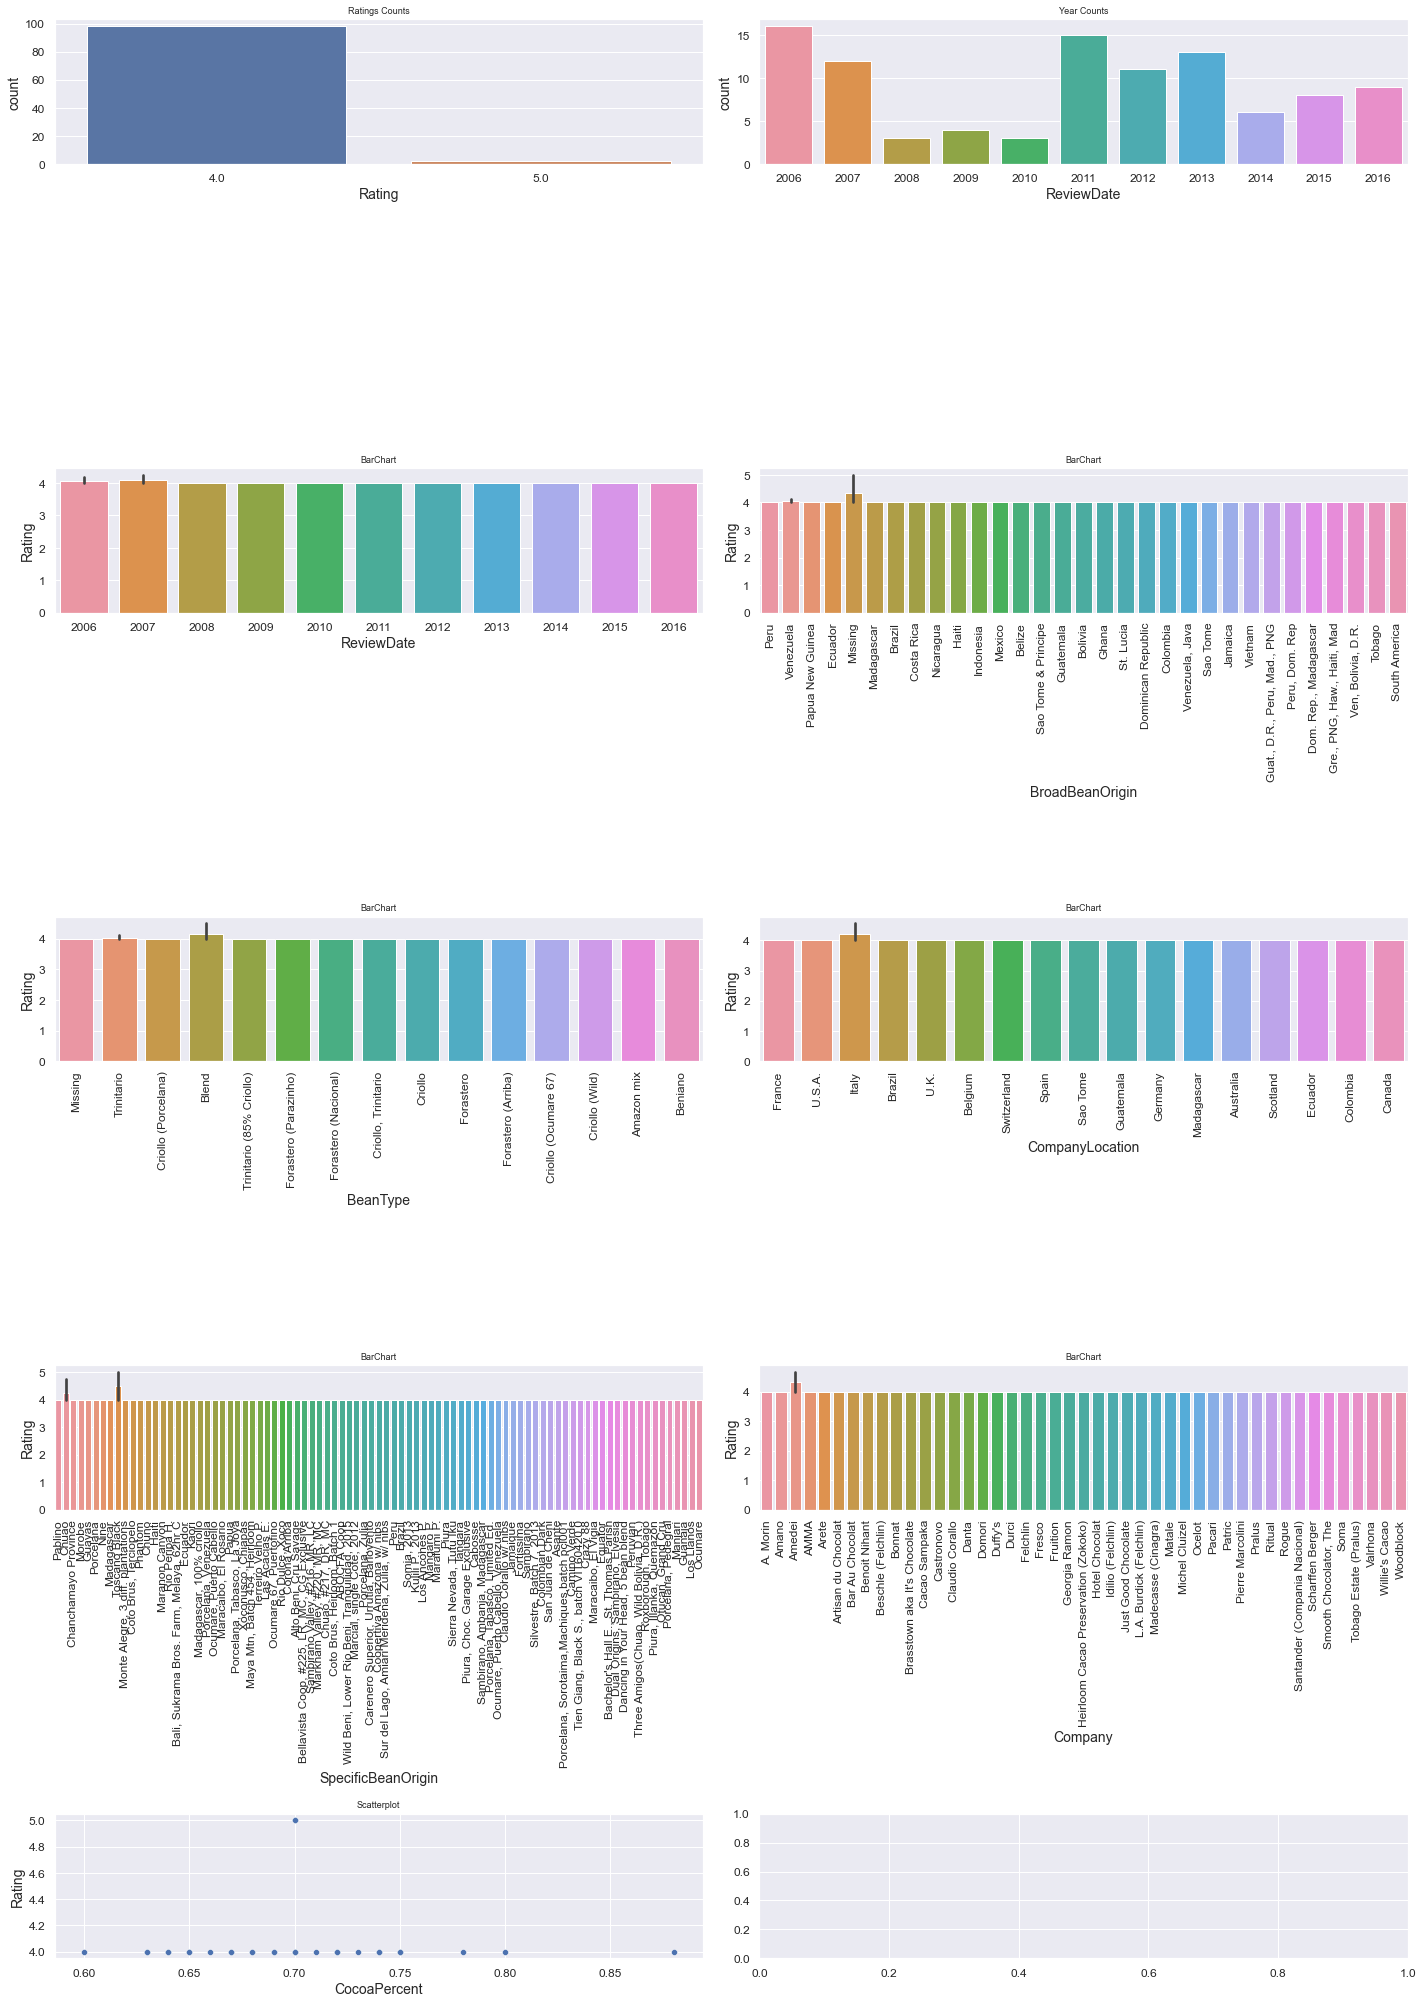

In [57]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Ratings Counts")
sns.countplot(df2.Rating)

plt.subplot(7,2,2)
plt.title("Year Counts")
sns.countplot(df2.ReviewDate)

plt.subplot(7,2,3)
plt.title("BarChart")
sns.barplot(x=df2.ReviewDate, y=df2.Rating, data=df2)

plt.subplot(7,2,4)
plt.title("BarChart")
plt.xticks(rotation=90)
sns.barplot(x=df2.BroadBeanOrigin, y=df2.Rating, data=df2)

plt.subplot(7,2,5)
plt.title("BarChart")
plt.xticks(rotation=90)
sns.barplot(x=df2.BeanType, y=df2.Rating, data=df2)

plt.subplot(7,2,6)
plt.title("BarChart")
plt.xticks(rotation=90)
sns.barplot(x=df2.CompanyLocation, y=df2.Rating, data=df2)

plt.subplot(7,2,7)
plt.title("BarChart")
plt.xticks(rotation=90)
sns.barplot(x=df2.SpecificBeanOrigin, y=df2.Rating, data=df2)

plt.subplot(7,2,8)
plt.title("BarChart")
plt.xticks(rotation=90)
sns.barplot(x=df2.Company, y=df2.Rating, data=df2)

plt.subplot(7,2,9)
plt.title("Scatterplot")
sns.scatterplot(x=df2.CocoaPercent, y=df2.Rating, data=df2)

plt.subplot(7,2,10)
plt.title("")
sns.scatterplot()


plt.tight_layout()
plt.show()

In [58]:
df3 = df2[df2["CocoaPercent"] >= 0.8]

In [59]:
df3

,Company,SpecificBeanOrigin,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,RatingCat
1335,Pralus,Fortissima,2006,0.80,France,4.00,"Criollo, Trinitario",Ecuador,4.00
1528,Soma,Crazy 88,2013,0.88,Canada,4.00,Missing,"Guat., D.R., Peru, Mad., PNG",4.00


### Save to CSV

In [60]:
df3.to_csv("chocohighrating.csv", index=False)

#### Python code done by Dennis Lam